# Practical work on decision trees
_Author: Benjamin Ternot_

This practial work on decision trees uses https://scikit-learn.org/stable/modules/tree.html


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import numpy as np
import itertools

# to get the documentation: use help(tree.DecisionTreeClassifier)


In [2]:
# Some functions to display arrays using LaTeX/Markdown
def array_to_markdown(arr):
    if (arr.ndim==1):
        return r'\begin{pmatrix}' + ' & '.join([str(elem) for elem in arr]) + r'\end{pmatrix}'
    elif (arr.ndim ==2):
        latex_str = r'\begin{pmatrix}'
        for row in arr:
            latex_str += ' & '.join([str(elem) for elem in row])
            latex_str += r'\\'
        latex_str += r'\end{pmatrix}'
        return latex_str
    raise ValueError(f" array can not be display if it has {arr.ndim()} dimensions") 
def display_markdown(string):
    display(Markdown(string))

In [3]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', rotation=0, ha='right')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    return np.trace(cm)/np.sum(cm)

In [4]:
# Modify the color of the plot for dark background
DARK_BG = True

if DARK_BG:
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['axes.titlecolor'] = 'white'
    BG = 'dimgray'
else:
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    BG = 'white'

## I. A very simple example, with two examples X, each in one class y

In [19]:
clf = tree.DecisionTreeClassifier()
X = [[0, 0], [1, 1]]
y = [0, 1]
#Tree construction
clf = clf.fit(X, y)
# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1')]

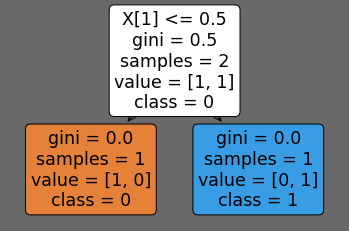

In [20]:
# display of the tree
plt.figure(facecolor=BG)
tree.plot_tree(clf, filled=True, rounded=True, class_names=['0', '1'], feature_names=['X[1]', 'X[2]'])

### Question 1: What is the node test used to build the tree? Explain the prediction for the new sample.
<div class="alert alert-block alert-success"> <b>Answer:</b>

* The node test is the following: if X[1] <= 0.5, then the class is 0, else the class is 1.

* The prediction for the new sample is 1 because 2>0.5.
</div>


## II. A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
See https://archive.ics.uci.edu/ml/datasets/Iris

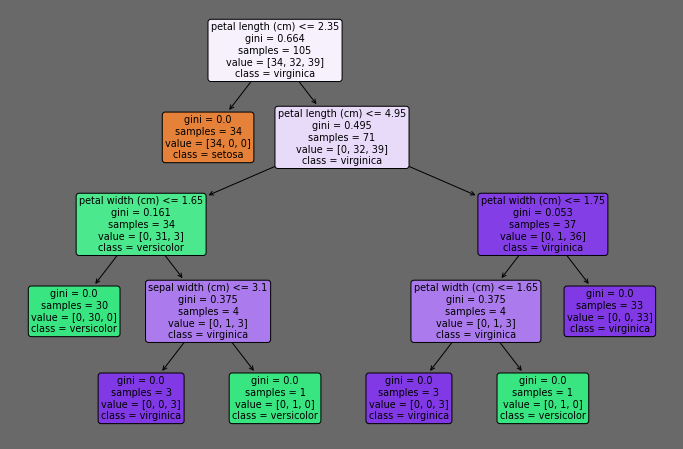

In [21]:
X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(12,8), facecolor=BG)
tree.plot_tree(clf,filled=True, rounded=True, class_names=iris.target_names, feature_names=iris.feature_names) 
plt.show()

In [22]:
# prediction on the test set and computation of the accuracy

clf.predict(X_test)
clf.score(X_test, y_test)


0.9777777777777777

### Question 2: change the initial splitting of the dataset by reducing the size of the training set.  What do you observe on the tree? on the accuracy?
<div class="alert alert-block alert-success"> <b>Answer:</b>

* By reducing the size of the training set, the tree is less deep and has thus fewer nodes
* The accuracy is a bit lower, but still, stays at 96%.

</div>

### Question 3: `clf = tree.DecisionTreeClassifier()` uses default parameters (Gini criterion, no limit on max_depth...).  Change the `max_depth parameter`, the `min_samples_leaf` parameter, and others if enough time. Conclusion?
<div class="alert alert-block alert-success"> <b>Answer:</b>

* By changing the `max_depth parameter` (reducing it), the tree is less deep and thus fewer cuts are made. The accuracy is lower because the tree is less complex and does not allow much conjonction of attributes.
* By increasing the `min_samples_leaf` parameter, final nodes are more general. That could lead to a better generalization of the model, by avoiding overfitting, even if we can have a lower accuracy.

</div>


Confusion matrix: $$\mathcal{C}=\begin{pmatrix}16 & 0 & 0\\0 & 17 & 1\\0 & 0 & 11\\\end{pmatrix}$$

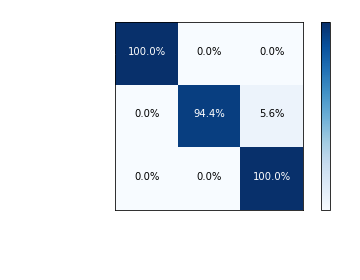

In [23]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
display_markdown(f"Confusion matrix: $$\mathcal{{C}}={array_to_markdown(cm)}$$")
plot_confusion_matrix(cm, classes=iris.target_names, normalize=True)
plt.show()

### Question 4: by testing different trees (built with different parameter values), does a class appear as easier to classify than the others?

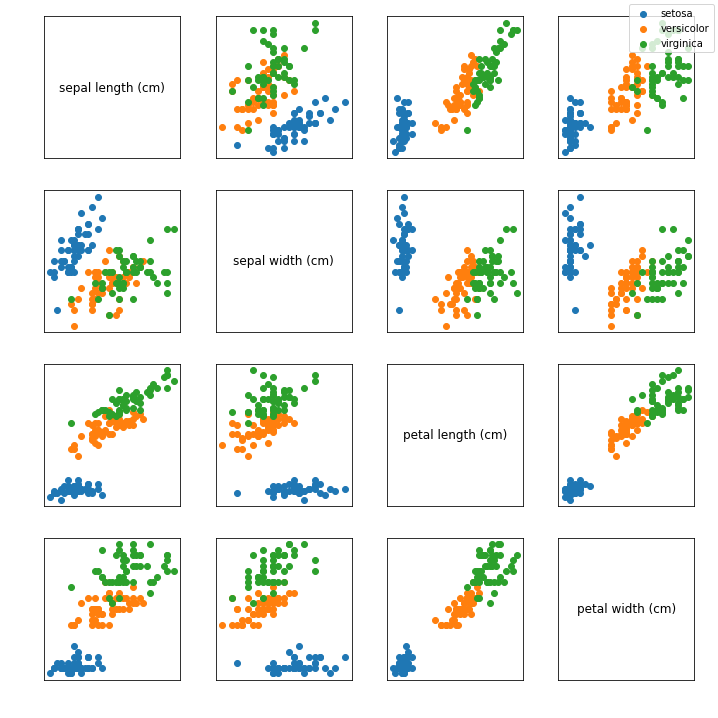

In [24]:
# Let's see the scatter plot of the data
feature_names = iris.feature_names

# Create scatter plots for each pair of features
num_features = X.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(10, 10))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            for target in set(y):
                axes[i, j].scatter(X[y == target, j], X[y == target, i], label=iris.target_names[target])
        else:
            axes[i, j].text(0.5, 0.5, feature_names[i], horizontalalignment='center', verticalalignment='center', fontsize=12)
        if i == num_features - 1:
            axes[i, j].set_xlabel(feature_names[j])
        if j == 0:
            axes[i, j].set_ylabel(feature_names[i])

# Add legend
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Answer:</b>

The class 1 (_setosa_) is easier to classify than the others because it is well separated from the other classes, especially on the 3rd and 4th attributes (X[2] and X[3] in python). Thus, almost every tree separates it at the root node.
</div>